<a href="https://colab.research.google.com/github/anshumaannn/Work/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import plotly.express as px
import squarify
from datetime import datetime

# Dataset Exploration

In [ ]:
df = pd.read_csv('netflix1.csv')

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
display(df.describe(include='all'))

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


Data Quality Check & Cleaning


In [ ]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['duration'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))

In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (8790, 13)


# Data Visualization & Deriving Insights

Univariate Analysis

<ipython-input-38-478f9067bdaa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


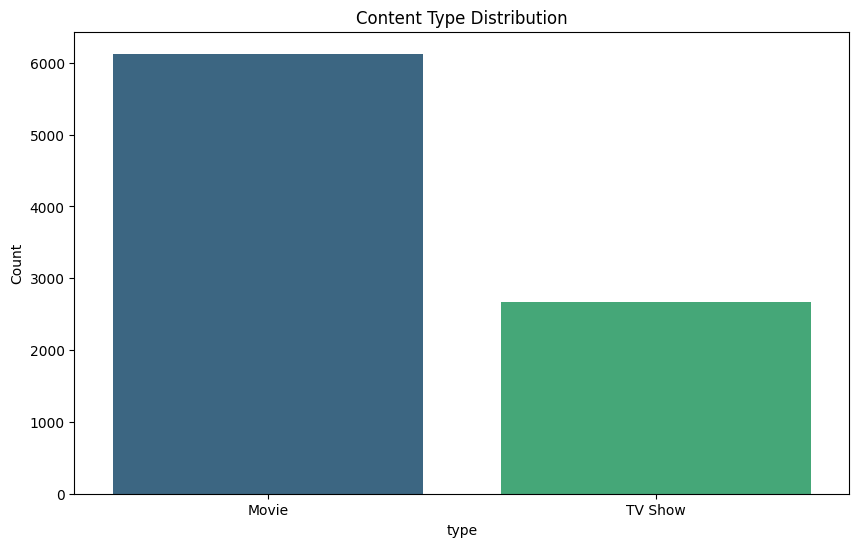

In [ ]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Content Type Distribution')
plt.ylabel('Count')
plt.show()

<ipython-input-39-f163e3bcd363>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


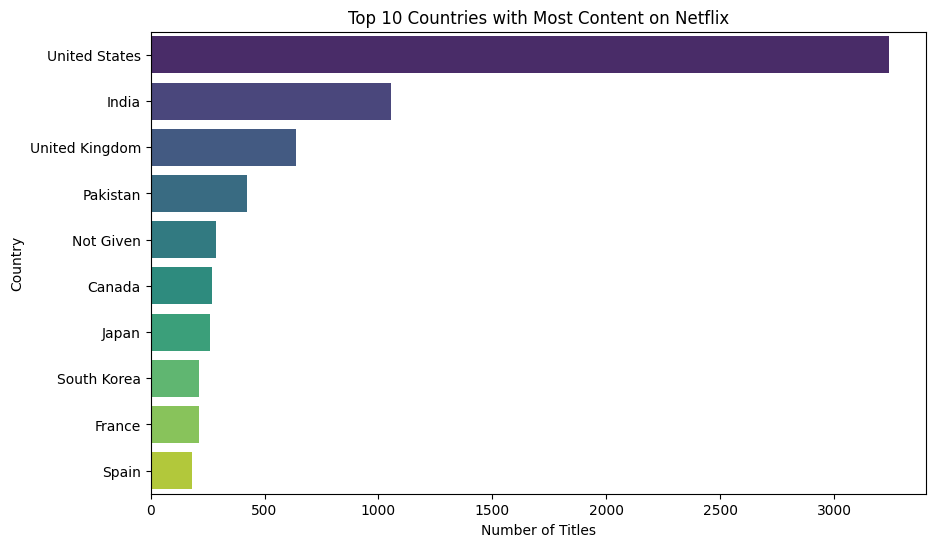

In [ ]:
# Count titles by country
top_countries = df['country'].value_counts().head(10)

# Plot top countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

<ipython-input-40-a9e420ce23d6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='coolwarm')


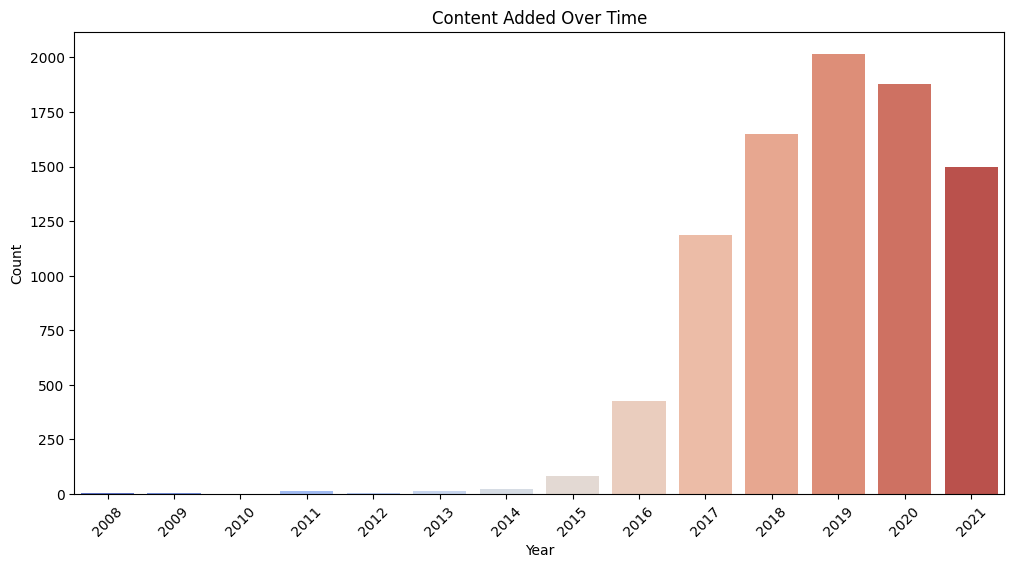

In [ ]:
# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

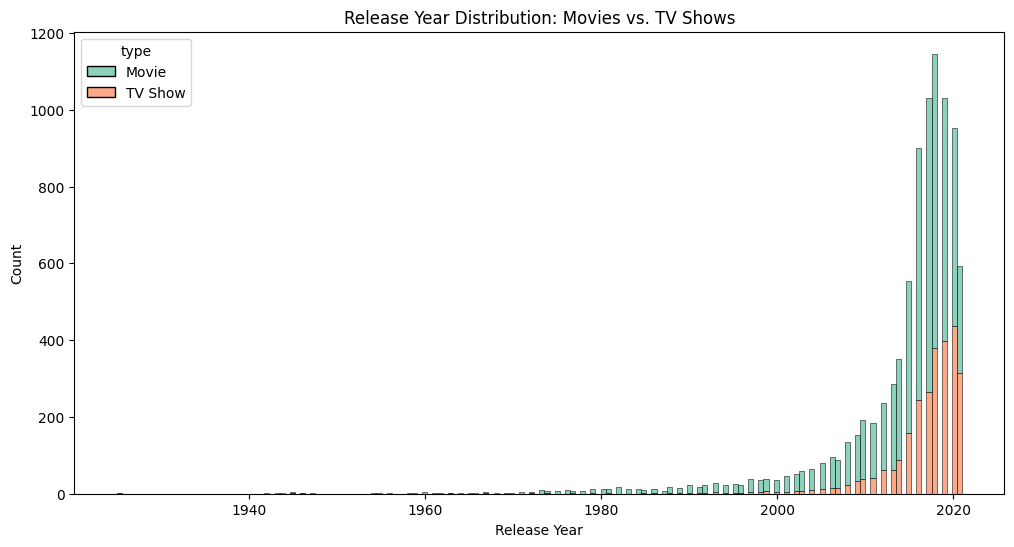

In [ ]:
# Compare release years of movies and TV shows
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', hue='type', multiple='stack', palette='Set2')
plt.title('Release Year Distribution: Movies vs. TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

Multivariate Analysis


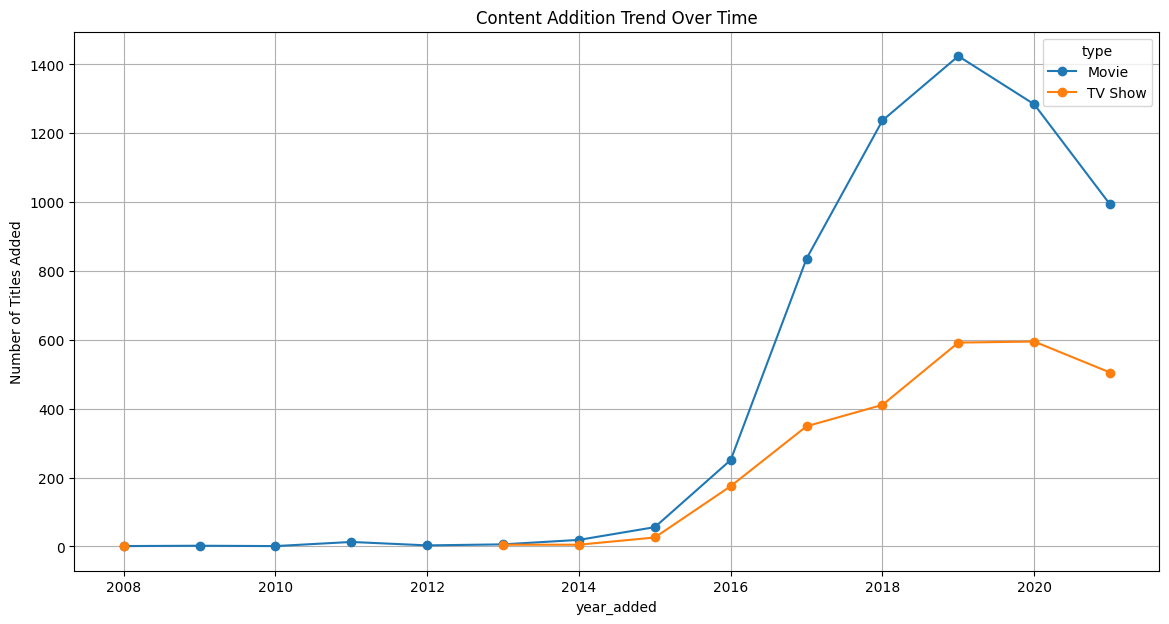

In [ ]:
added_trend = df.groupby(['year_added','type']).size().unstack()
added_trend.plot(kind='line', figsize=(14,7), marker='o')
plt.title('Content Addition Trend Over Time')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

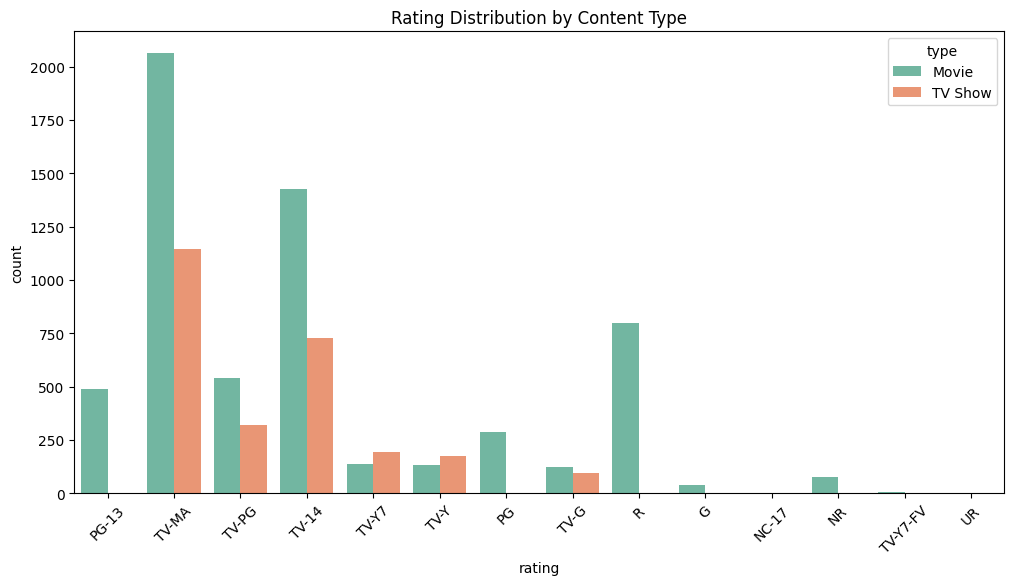

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', hue='type', palette='Set2')
plt.title('Rating Distribution by Content Type')
plt.xticks(rotation=45)
plt.show()

Advanced Visualizations

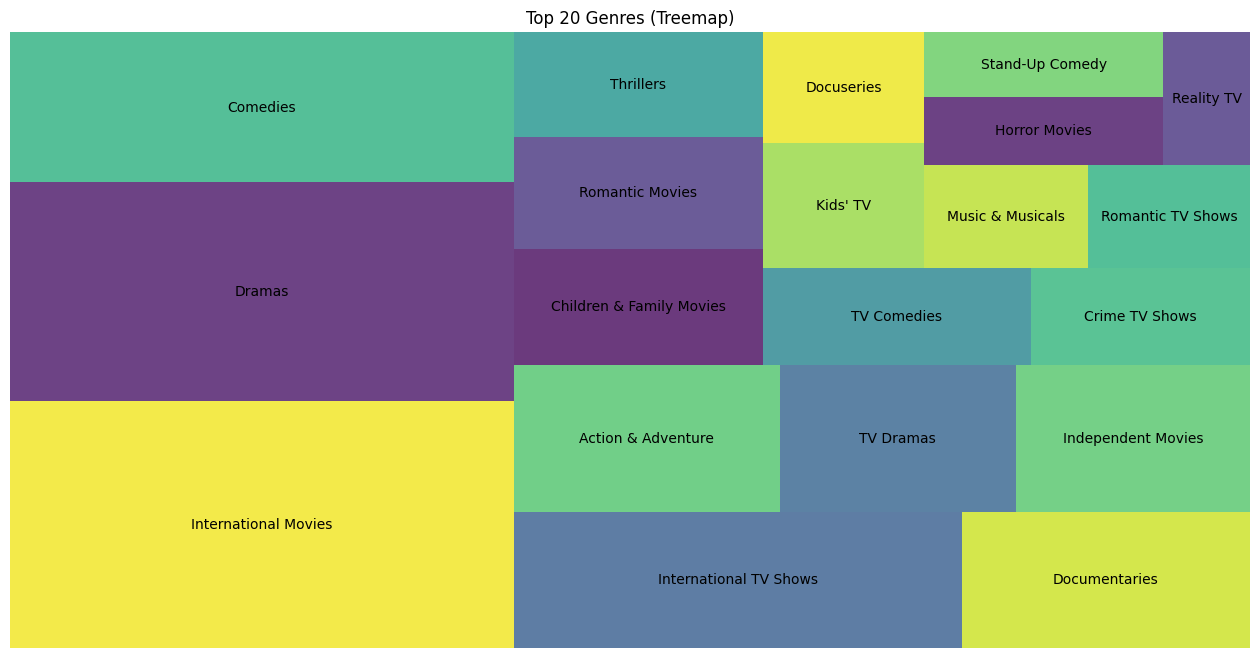

In [ ]:
genres = df['listed_in'].str.split(', ').explode().value_counts().head(20)
plt.figure(figsize=(16,8))
squarify.plot(sizes=genres.values, label=genres.index, alpha=.8)
plt.axis('off')
plt.title('Top 20 Genres (Treemap)')
plt.show()

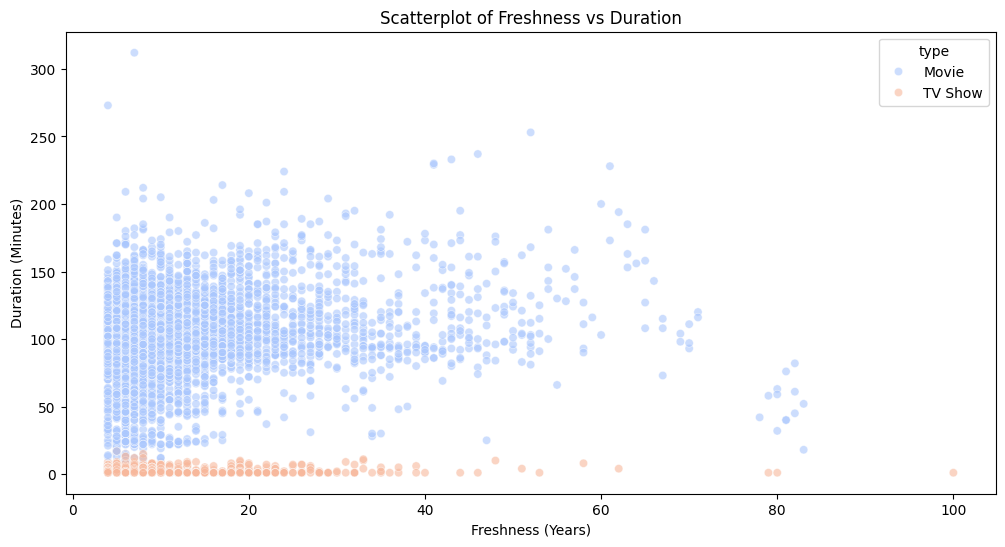

In [ ]:
# Assuming 'freshness' should be calculated as years since release:
df['freshness'] = datetime.now().year - df['release_year']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='freshness', y='duration', hue='type', palette='coolwarm', alpha=0.6)
plt.title("Scatterplot of Freshness vs Duration")
plt.xlabel("Freshness (Years)")
plt.ylabel("Duration (Minutes)")
plt.show()

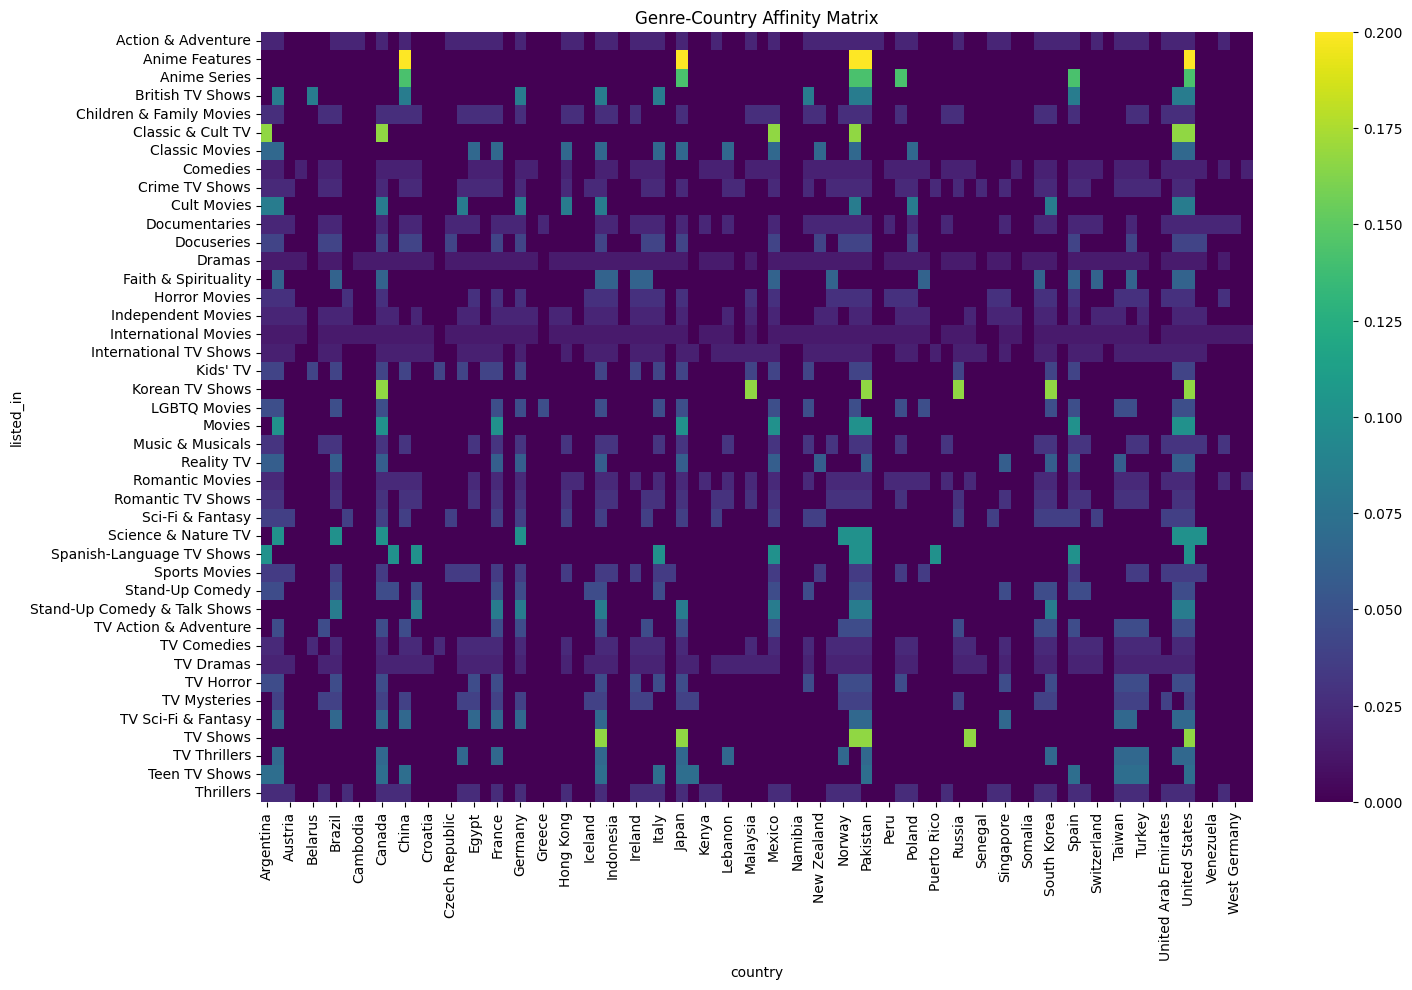

In [ ]:
# Identify underrepresented genres
genre_country = df[['listed_in', 'country']].copy()  # Create a copy to avoid modifying the original df
genre_country.dropna(subset=['listed_in', 'country'], inplace=True) # Drop rows with missing values in 'listed_in' or 'country'

genre_country['listed_in'] = genre_country['listed_in'].str.split(', ')  # Split genres into lists
genre_country = genre_country.explode('listed_in')  # Explode the lists of genres into separate rows
genre_country.drop_duplicates(inplace=True)  # Drop duplicate rows before creating crosstab

genre_matrix = pd.crosstab(genre_country['listed_in'], genre_country['country'])  # Create the crosstab
plt.figure(figsize=(16, 10))
sns.heatmap(genre_matrix.apply(lambda x: x / x.sum(), axis=1), cmap='viridis') # Normalize across rows (axis=1)
plt.title('Genre-Country Affinity Matrix')
plt.show()

Text(120.72222222222221, 0.5, 'Countries')

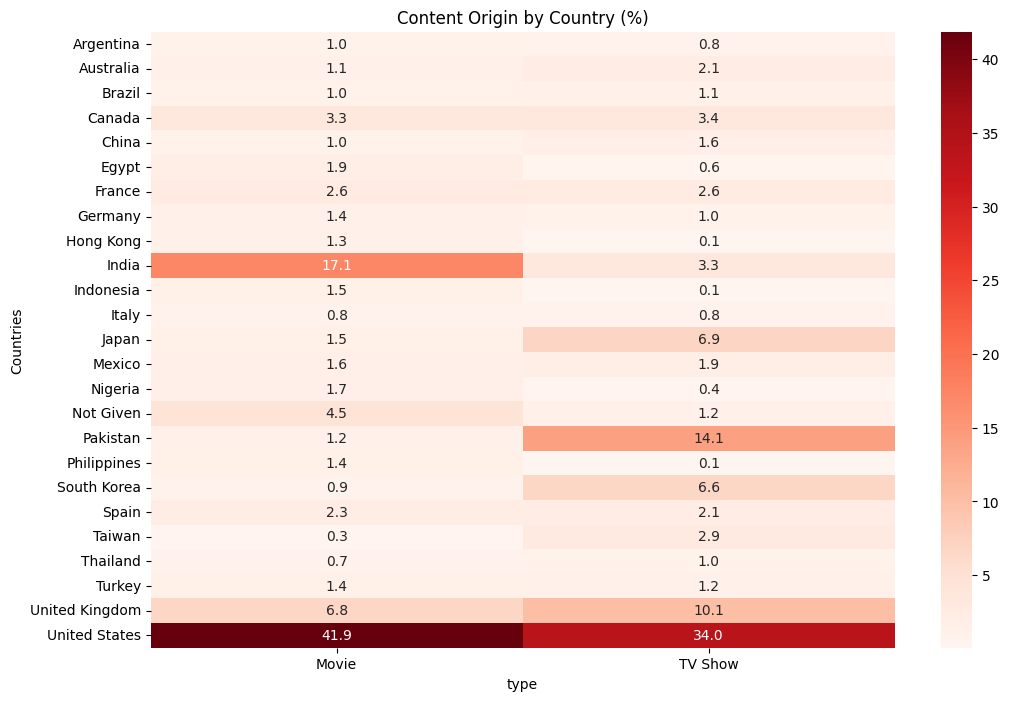

In [ ]:
country_matrix = df[df['country']!='Unknown']['country'].str.get_dummies(', ')
country_matrix = country_matrix.groupby(df['type']).sum().T
country_matrix = country_matrix[country_matrix.sum(axis=1)>50]

plt.figure(figsize=(12,8))
sns.heatmap(country_matrix.apply(lambda x: x/x.sum()*100),
           annot=True, cmap='Reds', fmt='.1f')
plt.title('Content Origin by Country (%)')
plt.ylabel('Countries')

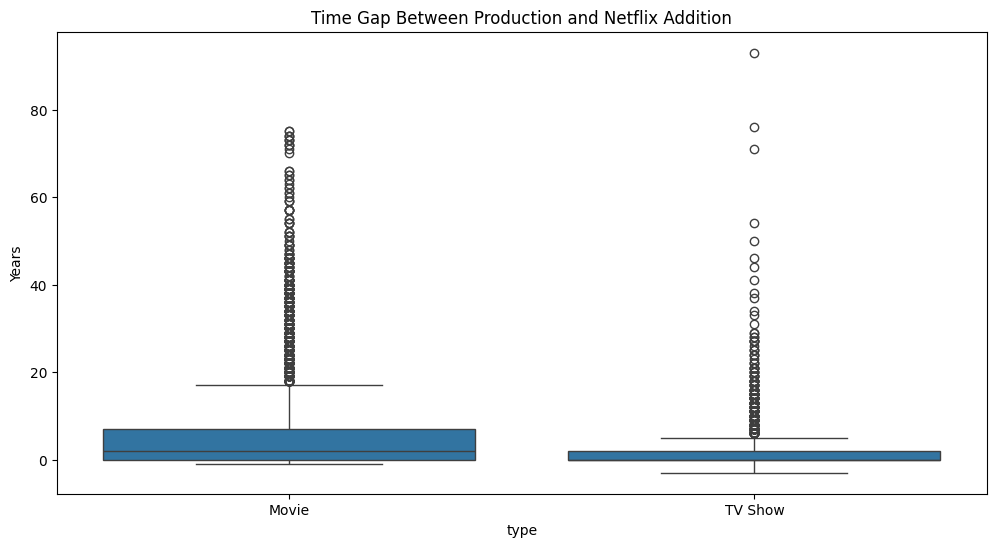

In [ ]:
df['years_to_add'] = df['year_added'] - df['release_year']
plt.figure(figsize=(12,6))
sns.boxplot(x='type', y='years_to_add', data=df)
plt.title('Time Gap Between Production and Netflix Addition')
plt.ylabel('Years')
plt.show()

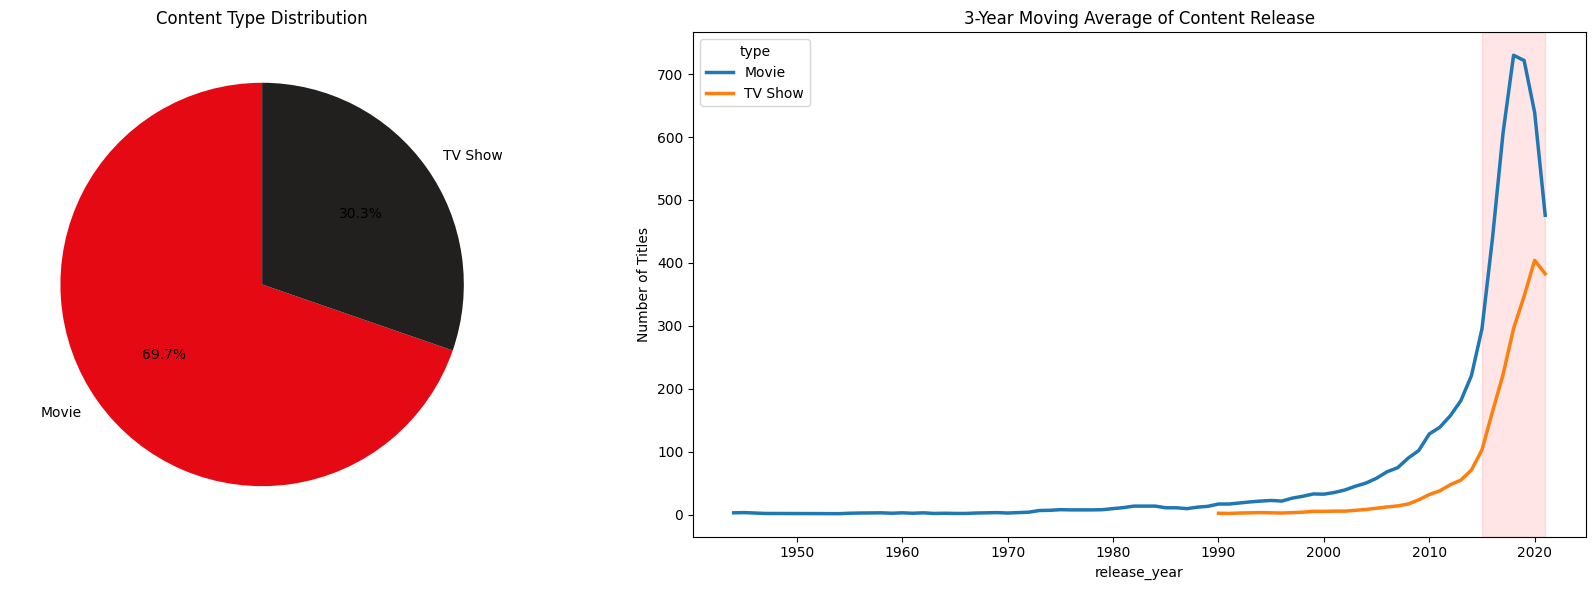

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(18,6))

# Pie Chart for Content Type
type_counts = df['type'].value_counts()
ax[0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',
        colors=['#E50914','#221F1F'], startangle=90)
ax[0].set_title('Content Type Distribution')

# Line Plot for Release Year Trends
yearly_content = df.groupby(['release_year','type']).size().unstack()
yearly_content.rolling(3).mean().plot(ax=ax[1], linewidth=2.5)
ax[1].axvspan(2015, 2021, alpha=0.1, color='red')
ax[1].set_title('3-Year Moving Average of Content Release')
ax[1].set_ylabel('Number of Titles')
plt.tight_layout()

<ipython-input-50-ca7d8dc64bb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='addition_delay', data=df, showfliers=False,


Text(0, 0.5, 'Years Delay')

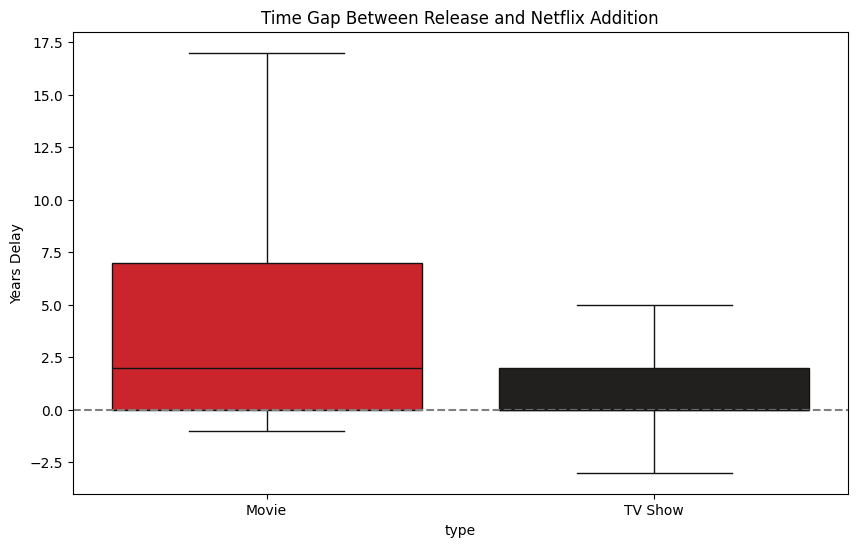

In [ ]:
df['addition_delay'] = df['year_added'] - df['release_year']
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='addition_delay', data=df, showfliers=False,
           palette=['#E50914','#221F1F'])
plt.axhline(0, color='grey', linestyle='--')
plt.title('Time Gap Between Release and Netflix Addition')
plt.ylabel('Years Delay')

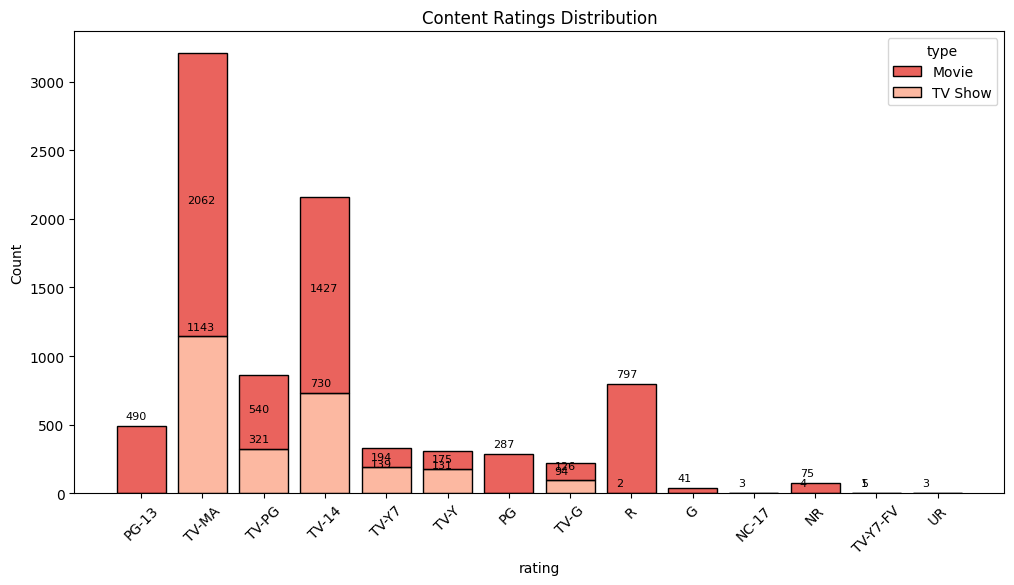

In [ ]:
rating_order = df['rating'].value_counts().index
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='rating', hue='type', multiple='stack',
            palette='Reds_r', shrink=0.8, hue_order=['Movie','TV Show'])
plt.title('Content Ratings Distribution')
plt.xticks(rotation=45)
for rect in plt.gca().patches:
    height = rect.get_height()
    if height > 0:
        plt.gca().text(rect.get_x()+0.15, height+50, f'{int(height)}',
                      fontsize=8)

<ipython-input-52-7dfd61dccfba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='type', y='freshness', palette='coolwarm')


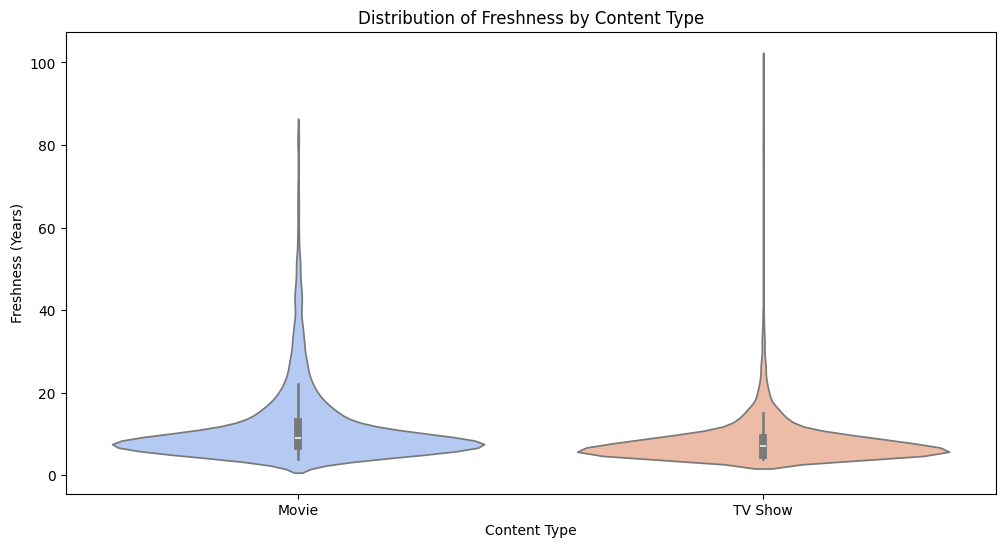

In [ ]:
# Assuming 'freshness' should be calculated as years since release:
df['freshness'] = datetime.now().year - df['release_year']

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='type', y='freshness', palette='coolwarm')
plt.title("Distribution of Freshness by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Freshness (Years)")
plt.show()

<ipython-input-53-a0212855753f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=movies, x='duration_min', palette=['#E50914'])


Text(92, 0.2, 'Industry Standard\n90min')

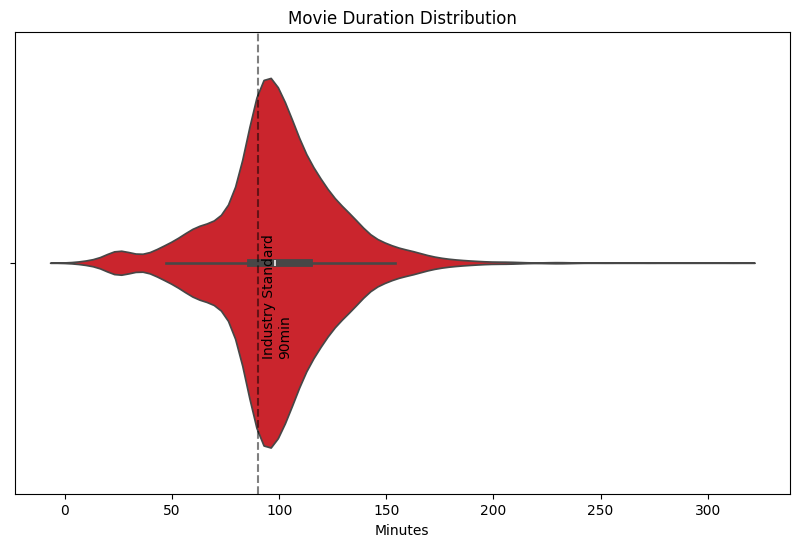

In [ ]:
# Separate movie durations and TV seasons
movies = df[df['type']=='Movie'].copy()
# Convert 'duration' to string before using .str.extract
movies['duration_min'] = movies['duration'].astype(str).str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,6))
sns.violinplot(data=movies, x='duration_min', palette=['#E50914'])
plt.axvline(90, color='black', linestyle='--', alpha=0.5)
plt.title('Movie Duration Distribution')
plt.xlabel('Minutes')
plt.text(92, 0.2, 'Industry Standard\n90min', rotation=90)

(0.0, 100.0, 0.0, 100.0)

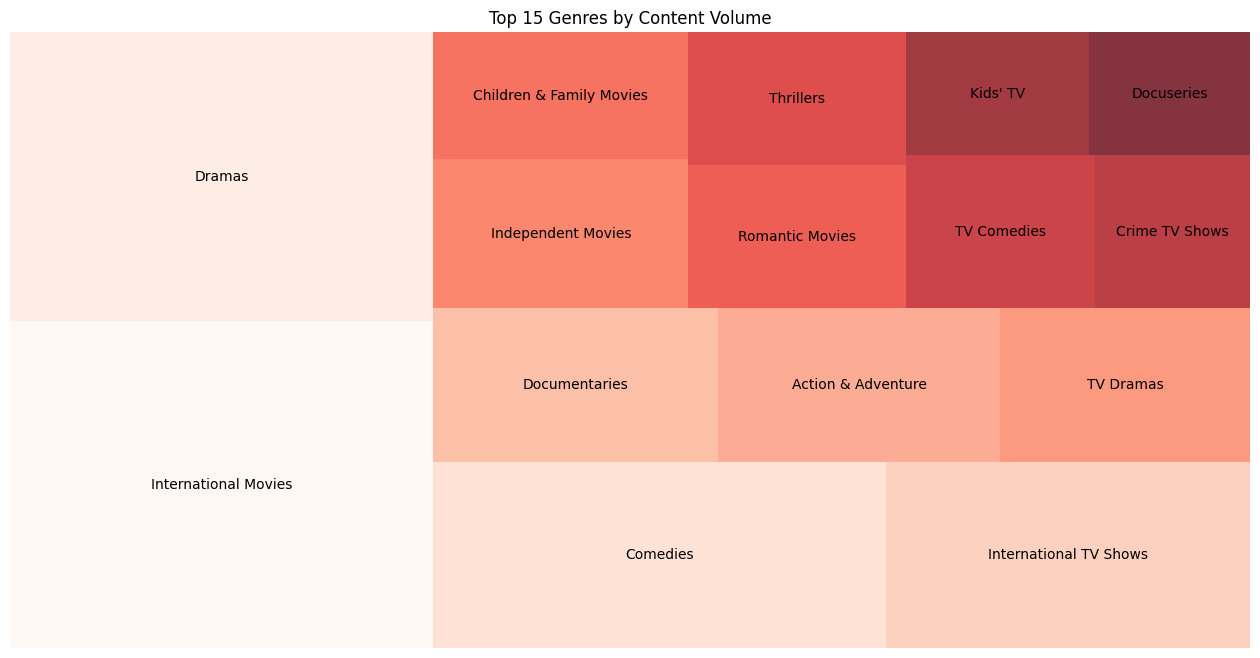

In [ ]:
genres = df['listed_in'].str.split(', ').explode()
genre_counts = genres.value_counts().nlargest(15)

plt.figure(figsize=(16,8))
squarify.plot(sizes=genre_counts, label=genre_counts.index,
             color=plt.cm.Reds(np.linspace(0,1,15)), alpha=.8)
plt.title('Top 15 Genres by Content Volume')
plt.axis('off')

Text(0.5, 1.0, 'Monthly Content Additions Pattern')

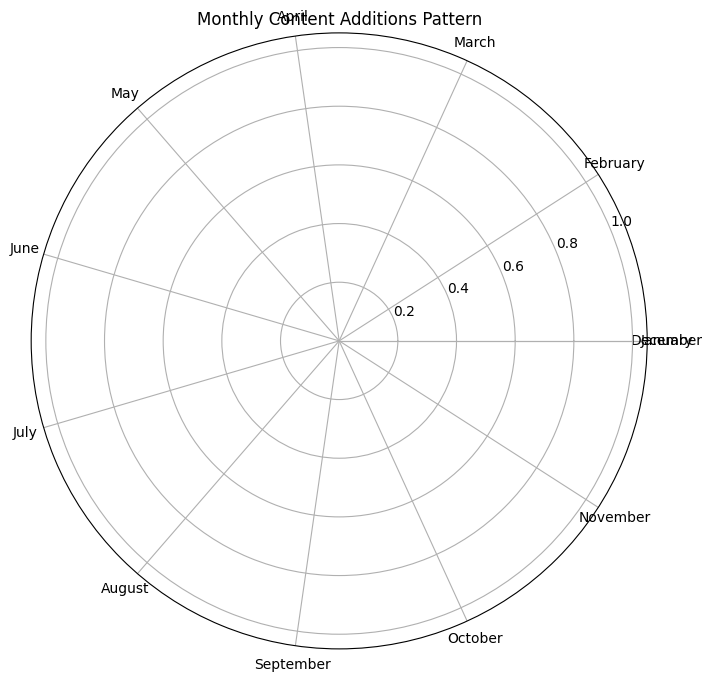

In [ ]:
month_order = ['January','February','March','April','May','June',
              'July','August','September','October','November','December']
month_counts = df['month_added'].value_counts().reindex(month_order)

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
theta = np.linspace(0, 2*np.pi, 12)
ax.plot(theta, month_counts, color='#E50914')
ax.fill(theta, month_counts, color='#E50914', alpha=0.2)
ax.set_xticks(theta)
ax.set_xticklabels(month_order)
plt.title('Monthly Content Additions Pattern')

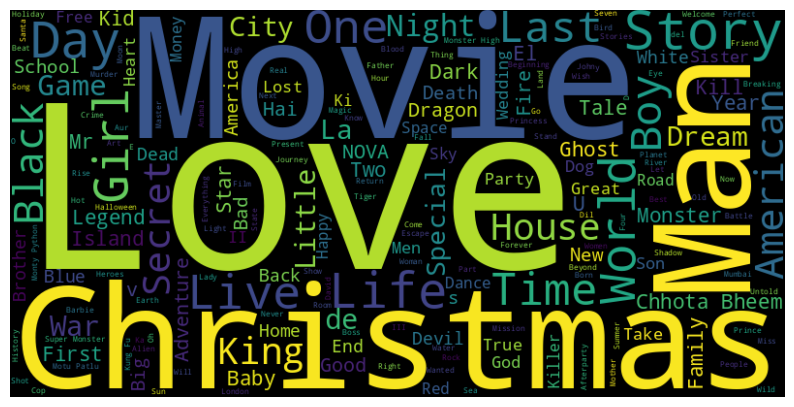

In [ ]:
# Generate word cloud for movie titles
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# preparing for potential machine learning tasks.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data cleaning
df = df.dropna(subset=['rating'])  # Remove rows with missing critical features
df['duration'] = df['duration'].fillna('0')  # Handle missing durations

In [ ]:
# Feature engineering
def feature_engineering(df):
    # Convert 'duration' to string if it's not already
    if df['duration'].dtype != object:  # object dtype represents strings in pandas
        df['duration'] = df['duration'].astype(str)
    # Extract numerical duration
    df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

    # Country features (top 10 countries)
    top_countries = df['country'].str.split(', ').explode().value_counts().head(10).index.tolist()
    for country in top_countries:
        df[f'country_{country}'] = df['country'].apply(lambda x: 1 if country in str(x) else 0)

    # Genre features (top 10 genres)
    top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10).index.tolist()
    for genre in top_genres:
        df[f'genre_{genre}'] = df['listed_in'].apply(lambda x: 1 if genre in str(x) else 0)

    # Date features
    df['year_added'] = pd.to_datetime(df['date_added']).dt.year
    df['month_added'] = pd.to_datetime(df['date_added']).dt.month

    # Content age
    df['content_age'] = df['year_added'] - df['release_year']

    # Encode categorical variables
    le = LabelEncoder()
    df['rating_encoded'] = le.fit_transform(df['rating'])

    return df

df = feature_engineering(df)

In [ ]:
# Select final features
features = [
    'release_year',
    'duration_num',
    'year_added',
    'month_added',
    'content_age',
    'rating_encoded'
] + [col for col in df.columns if col.startswith('country_') or col.startswith('genre_')]

target = 'type'

In [ ]:
# Final dataset preparation
X = df[features]
y = df[target].apply(lambda x: 1 if x == 'TV Show' else 0)  # Encode target

# Handle remaining missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Initialize and train Random Forest
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=150,
                       n_jobs=-1, random_state=42)

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00       533

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



<Figure size 800x600 with 0 Axes>

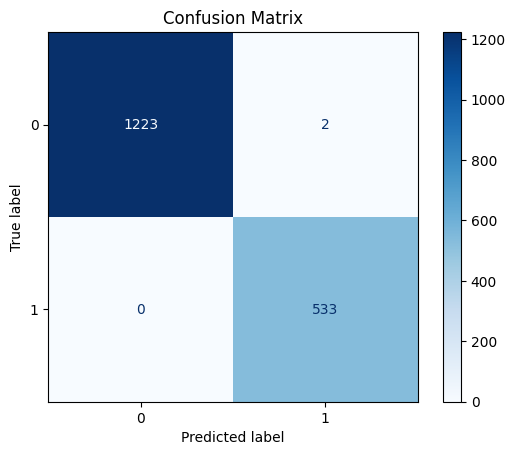

<ipython-input-101-26b19a4ca5b0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


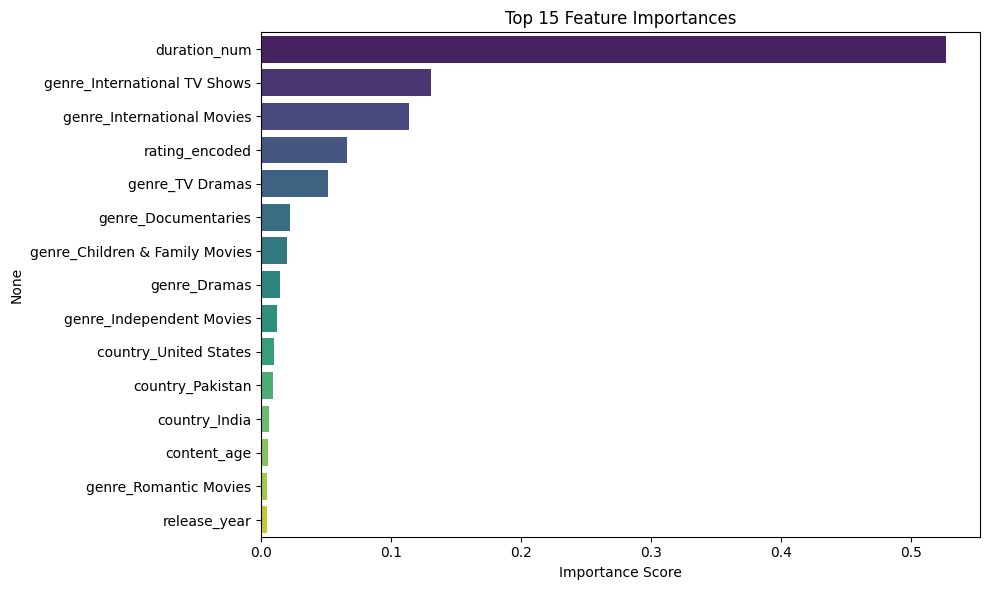

In [ ]:
# Model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8,6))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    # Feature importance
    feature_importance = pd.Series(model.feature_importances_, index=X.columns)
    top_features = feature_importance.sort_values(ascending=False).head(15)

    plt.figure(figsize=(10,6))
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

evaluate_model(rf, X_test, y_test)